# Reinforcement Learning
page 441<br>
For details, see
- https://github.com/ageron/handson-ml/blob/master/16_reinforcement_learning.ipynb,
- https://gym.openai.com,
- http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html,
- https://www.jstor.org/stable/24900506?seq=1#metadata_info_tab_contents,
- http://book.pythontips.com/en/latest/enumerate.html, and
- https://docs.python.org/2.3/whatsnew/section-slices.html (on slices).

Reinforcement Learning is one of the most excititng fields of Machine Learning today. It has been around since the 1950s but flying below the radar most of the time. In 2013, *DeepMind* (at that time still an independent start-up in London) produced a reinforcement learning algorithm that could achieve superhuman performance of playing about any Atari game without having prior domain knowledge. Notably, *AlphaGo*, also a reinforcement learning algorithm by Deepmind, beat world champion *Lee Sedol* in the board game *Go* in March 2016. This has become possible by applying the power of Deep Learning to the field of Reinforcement Learning.<br><br>
Two very important concepts for Reinforcement Learning are **policy gradients** and **deep Q-networks** (DQN).
## Learning to Optimize Rewards
page 442<br>
Reinforcement learning utilizes a software **agent** that makes **observations** and takes **actions** in an **environment** by which it can earn **rewards**. Its objective is to learn to act in a way that is expected to maximise long-term rewards. This can be linked to human behaviour as humans seem to try to minimize pain (negative reward / penalty) and maximise pleasure (positive reward). The setting of Reinforcement Learning is quite broad. The following list shows some typical applications.
- The agent can be the program controlling a walking robot. In this case, the environment is the real world, the agent obersrves the environment through a set of *sensors* such as cameras and touch sensors, and its actions consist of sending signals to activate motors. It may be programmed to get positive rewards whenever it approaches the target destination, and negative rewards whenever it wastes time, goes in the wrong direction, or falls down.
- The agent can be the program controlling Ms. Pac-Man. In this case, the environment is a simulation of the Atari game, the actions are the nine possible joystick positions (upper left, down, center, and so on), the observations are screenshots, and the rewards are just the game points.
- Similarly, the agent can be the program playing a board game such as the game of *Go*.
- The agent does not have to control a physically (or virtually ) moving thing. For example, it can be a smart thermostat, getting rewards whenever it is close to the target temperature and saves energy, and negative rewards when humans need to tweak the temperature, so the agent must learn to anticipate human needs.
- The agent can observe stock market prices and decide how much to buy or sell every second. Rewards are obviously the monetary gains and losses.

Note that it is not necessary to have both positive and negative rewards. For example, using only negative rewards can be useful when a task shall be finished as soon as possible. There are many more applications of Reinforcement Learning, e.g., self-driving cars or placing ads on a webpage (maximizing clicks and/or buys).
## Policy Search
page 444<br>
The algorithm that the software agent uses to determine its action is called its **policy**. For example, the policy could be a neural network taking inputs (observations) and producing outputs (actions). The policy can be pretty much any algorithm. If that algorithm is not deterministic, it is called a *stochastic policy*.<br><br>

A simple, stochastic policy for a vacuum cleaner could be to go straight for a specified time and then turn with probability $p$ by a random angle $r$. In that example, the algorithm's *policy parameters* are $p$ and $r$. One example of *policy search* would be to try out all possible parameter values and then settle for those values that perform best (e.g., most dust picked up per time). However, if the *policy space* is too large, as is often the case, a near-optimal policy will likely be missed by such brute force approach.<br><br>

*Genetic algorithms* are another way to explore the policy space. For example, one may randomly create 100 policies, rank their performance on the task, and then filter out the bad performers. This could be done by strictly filtering out the 80 lowest performers, or filter out a policy with a probability that is high if the performance is low (this works often better). To restore the population of 100 policies, each of the 20 survivors may produce 4 offsprings, i.e., copies of the survivor[s] (parent algorithm[s]) with slight random modifications of its [their] policy parameters. With a single parent [two or more parents], this is referred to as asexual [sexual] reproduction. The surviving policies together with their offsprins constitute the next generation. This scheme can be continued until a satisfactory policy is found.<br><br>
Yet another approach is to use optimization techniques, e.g., *gradient ascent* (similar to gradient descent) to maximise the reward (similar to minimising the cost).
## Introduction to OpenAI Gym
page 445<br>
In order to train an agent, that agent needs an *environment* to operate in. The environment evolves subject to the agent's actions and the agent observes the environment. For example, an Atari game simulator is the environment for an agent that tries to learn to play an Atari game. If the agent tries to learn how to walk a humanoid robot in the real world, then the real world is the environment. Yet, the real world may have limitations when compared to software environments: if the real-world robot gets damaged, just clicking "undo" or "restart" will not suffice. It is also not possible to speed up training by having the time run faster (which would be the equivalent of increasing the clock rate or using a faster processor). And having thousands or millions of real-world robots train in parallel will be much more expensive than running simulations in parallel.<br><br>
In short, one generally wants to use a *simulated environment* at least for getting started. Here, we use the *OpenAI gym* (link at the top). A minimal installation only requires to run "pip3 install --upgrade gym" in a terminal. We shall try it out!

In [1]:
import gym                    # import gym from OpenAI
env = gym.make("CartPole-v0") # make CartPole environment
print(env)                    # print the cartpole environment
obs = env.reset()             # reset observations (in case this is necessary)
print(obs)                    # print the observations

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
<TimeLimit<CartPoleEnv<CartPole-v0>>>
[ 0.01911763 -0.04981526  0.02235611  0.01423974]


/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


The "make()" function creates an environment (here, the CartPole environment). After creation, the environment must be reset via the "reset()" method. This returns the first observation, in the form of four floats in a $1\times4$ NumPy array: (i) the horizontal position (0=center), (ii) the velocity, (iii) the angle of the pole (0=vertical), and (iv) its angular velocity.
<br>
So far so good. Some environments including the CartPole environment demand access to the screen to visualize the environment. As explained in the Github link (linked above), this may be problematic when Jupyter is used. However, one can work around this issue by using the following function (taken from the Github link) that will render the CartPole environment within a Jupyter notebook.

<IPython.core.display.Javascript object>


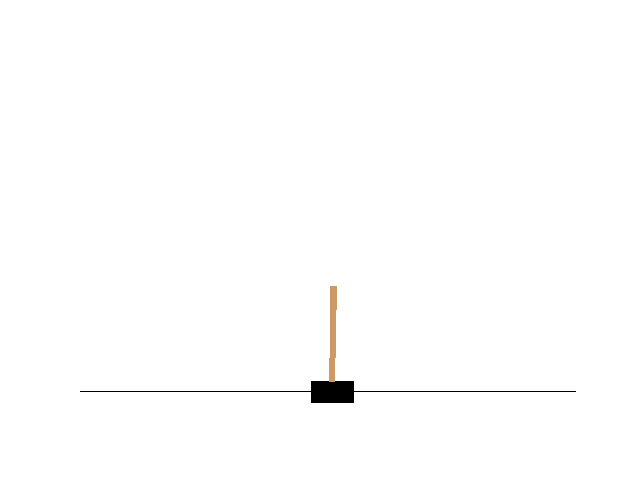

In [2]:
# further imports and plot specifications (taken from Github link above)
import numpy as np
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
# functions for rendering of the CartPole environment within the Jupyter notebook (taken from Github-link)
from PIL import Image, ImageDraw
try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True
except Exception:
    openai_cart_pole_rendering = False
def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        return env.render(mode="rgb_array")
    else:
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000
        pole_col = 0x669acc
        pos, vel, ang, ang_vel = obs
        img = Image.new("RGB", (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2,
                        cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col)
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w)
        return np.array(img)
def plot_cart_pole(env, obs):
    plt.close()
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
# now, employ the above code
openai_cart_pole_rendering = False # here, we do not even try to display the CartPole environment outside Jupyter
plot_cart_pole(env, obs)

Nice. So this is a visualization OpenAI's CartPole environment. After the visualization is finished (it may be a movie), it is best to "close" the visualization by tapping the off-button at its top-right corner.<br><br>
**Suggestion or Tip**<br>
Unfortunately, the CartPole (and a few other environments) renders the image to the screen even if you set the mode to "rgb_array". The only way to avoid this is to use a fake X server such as Xvfb or Xdummy. For example, you can install Xvfb and start Python using the following [shell] command: 'xcfb-run  -s "-screen 0 1400x900x24" python'. Or use the xvfb wrapper package (https://goo.gl/wR1oJl). [With the code from the Github link, we do not have to bother about all this.]<br><br>
To continue, we ought to know what actions are possible. This can be checked via the environment's "action_space" method.

In [3]:
env.action_space # check what actions are possible

Discrete(2)

There are two possible actions: accelerating left (represented by the integer 0) or right (integer 1). Other environments are going to have other action spaces. We accelerate the cart in the direction that it is leaning.

In [4]:
obs = env.reset()                          # reset again to get different first observations when rerunning this cell
print(obs)
angle = obs[2]                             # get the angle
print(angle)                 
action = int((1 + np.sign(angle)) / 2)     # compute the action
print(action)
obs, reward, done, info = env.step(action) # submit the action to the environment so the environment can evlolve
print(obs, reward, done, info)

[-0.01435942  0.0420023   0.00417418  0.0271142 ]
0.004174176652464501
1
[-0.01351937  0.23706414  0.00471646 -0.26424881] 1.0 False {}


The "step()" method executes the chosen action and returns 4 values:
1. "obs"<br>
This is the next observation.
2. "reward"<br>
This environment gives a reward for every time step (not more and not less). The only goal is to keep balancing the cart as long as possble.
3. "done"<br>
The value of this dictionary is "False" while the episode is running and "True" when the episode is finished. It will be finished when the cart moves out of its boundaries or the pole tilts too much.
4. info<br>
This dictionary may provide extra useful information (but not in the CartPole environment). This information can be useful for understanding the problem but shall not be used for adapting the policy. That would be cheating.

We now hardcode a simple policy that always accelerates the cart in the direction it is leaning.

In [5]:
# define a basic policy
def basic_policy(obs):
    angle = obs[2]                 # angle
    return 0 if angle < 0 else 1   # return action
totals = []                        # container for total rewards of different episodes
# run 500 episodes of up to 1000 steps each
for episode in range(500):         # run 500 episodes
    episode_rewards = 0            # for each episode, start with 0 rewards ...
    obs = env.reset()              # ... and initialize the environment
    for step in range(1000):       # attempt 1000 steps for each episode (the policy might fail way before)
        action = basic_policy(obs) # use our basic policy to infer the action from the observation
        obs, reward, done, info = env.step(action) # apply the action and make a step in the environment
        episode_rewards += reward  # add the earned reward
        if done:                   # if the environment says that it has finished ...
            break                  # ... this shall be the final step within the current episode
    totals.append(episode_rewards) # put the final episode rewards into the container for all the total rewards
# print statistics on the earned rewards
print("mean:", np.mean(totals),", std:", np.std(totals),", min:", np.min(totals),", max:", np.max(totals))

mean: 41.938 , std: 8.855854334845397 , min: 24.0 , max: 68.0


Even for 500 episodes, this policy did not manage to reach only 100 steps, not to speak of 1000. As can be seen from the additional code shown under the above Github link, the reason for this is that the pole quickly begins strongly oscillating back and forth. Certainly, the policy is just too simple: also taking the angular velocity of the pole into account should help avoiding wild angular oscillations. A more sophisticated policy might employ a neural network.
## Neural Network Policies
page 448<br>
Let's not just talk the talk but also walk the walk by actually implementing a neural network policy for the CartPole environment. This environment accepts only 2 possible actions: 0 (left) and 1 (right). So one output layer will be sufficient: it returns a value $p$ between 0 and 1. We will accelerate right with probability $p$ and – obviously – left with probability $1-p$.<br>
Why do we not go right with probability ${\rm heaviside}(p-0.5)$? This would hamper the algorithm from exploring further, i.e., it would slow down (or even stop) the learning progress, as can be illustrated with the following analogue. Consider going to a foreign restaurant for the first time. All items on the menu seem equally OK. You choose absolutely randomly one dish. If you happen to like it, you might from now on order this dish every time you visit the restaurant. Fair enough. But there might be even better dishes that you will never find out about if you stick to that policy. By just choosing this menu with a probability in the interval $(0.5,1)$, you will continue to explore the menu, and develop a better understanding of what menu is the best.<br><br>
Note that the CartPole environment returns on every instance the complete necessary information: (i) it contains the velocities (position and angle), so previous observations are not necessary to deduce them, and (ii) it is noise free, so previous observations are not necessary to deduce the actual values from an average. In that sense, the CartPole environment is really as simple as can be.<br><br>
The environment returns 4 observations so we will employ 4 input neurons. We have already mentioned that we only need one single output neuron. To keep things simple, this shall be it: 4 input neurons in the input and in the only hidden layer and 1 output neuron in the output layer. Now, let's cast this in code!

/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:496: FutureWarning: Passing (type, 1) or 

<IPython.core.display.Javascript object>


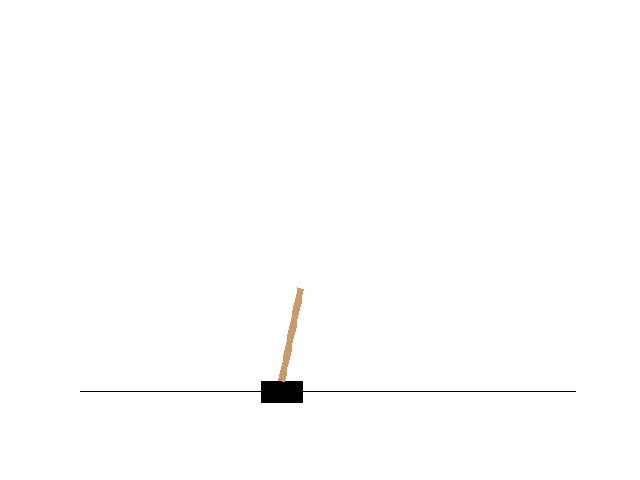

In [6]:
# code partially taken from Github link above
import tensorflow as tf
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
reset_graph()
# 1. specify the neural network architecture
n_inputs = 4
n_hidden = 4
n_outputs = 1
initializer = tf.variance_scaling_initializer()
# 2. build the neural network
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs, kernel_initializer=initializer)
outputs = tf.nn.sigmoid(logits)
# 3. select a random action based on the estimated probabilities
p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)
init = tf.global_variables_initializer()
# maximal number of steps and container for video frames
n_max_steps = 1000
frames = []
# start a session, run the graph, and close the environment (see Github link)
with tf.Session() as sess:
    init.run()
    obs = env.reset()
    for step in range(n_max_steps):
        img = render_cart_pole(env, obs)
        frames.append(img)
        action_val = action.eval(feed_dict={X: obs.reshape(1, n_inputs)})
        obs, reward, done, info = env.step(action_val[0][0])
        if done:
            break
env.close()
# use the below functions and commands to show an animation of the frames
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,
def plot_animation(frames, repeat=False, interval=40):
    plt.close()
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis("off")
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch),
                                   frames=len(frames), repeat=repeat, interval=interval)
video = plot_animation(frames)
plt.show()

Above, the numbered comments indicate what is happening in the subsequent code. Here are some details.
1. Definition of the Neural Network architecture (c.f. Figure 16-5 on page 449 of the book).
2. Building the Neural Network. Obviously, it is a vanilla (most basic) version. Via the sigmoid activation function, the output lies in the interval [0,1]. If more than two actions were possible, this scheme should use one output neuron per action and a softmax activation function instead of a sigmoid (refer to Chapter 4).
3. Use a multinomial probability distribution to map the probability to one single action. See https://en.wikipedia.org/wiki/Multinomial_distribution and the book for details.

## Evaluating Actions: The Credit Assignment Problem
page 451<br>
If we knew the optimal (target) probability for taking a certain action, we could just do regular machine learning by trying to minimize the cross entropy between that target probability and the estimated probability that we obtain from our policy (see above and below "Neural Network Policies"). However, we do not know the optimal probability for taking a certain action in a certain situation. We have to guess it based on subsequent rewards and penalties (negative rewards). However, rewards are often rare and usually delayed. So it is not clear which previous actions have contributed to earning the subsequent reward. This is the *Credit Assignment Problem*.<br>
One way to tackle the Credit Assignment Problem is to introduce a *discount rate* $r\in[0,1]$. A reward $x$ that occurs $n$ steps after an action - with $n=0$ if the reward is earned directly after the action - adds a score of $r^nx$ to the rewards assigned to that action. For exmaple, if $r=0.8$ and an action is immediately followed by a reward of $+10$, then $0$ after the next action, and $-50$ after the second next action, then that initial action is assigned a score of
$$+10+0-50\times 0.8^2=10-50\times0.64=10-32=-22\,.$$
Typical discount rates are 0.95 and 0.99. When actions have rather immediate consequences, $r=0.95$ is expected to be more suitable than $r=0.99$.<br>
Of course it can happen that in one specific run of the program, a good action happens to be followed by an observation with negative reward. However, on average, a good action will be followed by positive rewards (otherwise it is not a good action). So we need to make many runs to smoothen out the effect of untypical evolutions. Then the scores need to be normalized. In the CartPole environment for example, one could discretize the continuous observations into a finite number of intervals, such that different observations may lie within the same (or different) margins. Then, the scores within one interval should be added up and divided by the number of times the according action was taken, thus giving a representative score. Such scores shall be calculated for all possible actions given that observation. The mean score over all actions needs to be subtracted from each action's score. The resulting number should probably be normalized by the standard deviation and then mapped to probabilities assigned to taking these actions.
## Policy Gradients
page 452<br>
The training procedure that has been outlined above shall now be implemented using TensorFlow.
- First, let the neural network policy play the game several times and **at each step compute the gradients** that would make the chosen action even more likely, but don't apply thes gradients yet. Note that **the gradients involve the observation / state** of the system!
- Once you have **run several episodes (to reduce noise from odd evolutions)**, compute each action's score (using the method described in the previous paragraph).
- If an action's score is positive, it means that the action was good and you want to apply the grdients computed earler to make the action even more likel to be chosen in the future. However, if the score is negative, it means the action was bad and you want to apply the opposite gradients to make this action slightly *less* likely in the future. The solution is simply to **multiply each gradient vector by the corresponding action's score**.
- Finally, compute the mean of all the resulting gradient vectors, and us it to perform a **Gradient Descent** step.

We start with two functions. The first function calculated receives a list of rewards corresponding that occur one step after another and returns a list of accumulated and discounted rewards. The second function receives a list of such lists as well as a discount rate and returns the centered (subtraction of the total mean) and normalized (division by the total standard deviation) lists of rewards. Both functions are tested with simple inputs.

In [7]:
# build a function that calculates the accumulated and discounted rewards for all steps
def discount_rewards(rewards, discount_rate):
    discounted_rewards = np.empty(len(rewards))
    cumulative_rewards = 0
    for step in reversed(range(len(rewards))):                                  # go from end to start
        cumulative_rewards = rewards[step] + cumulative_rewards * discount_rate # the current reward has no discount
        discounted_rewards[step] = cumulative_rewards
    return discounted_rewards
# after rewards from 10 episodes, center and normalize the rewards in order to calculate the gradient (below)
def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate) # make a list of the lists with ...
                              for rewards in all_rewards]              # ... the rewards (i.e., a matrix)
    flat_rewards = np.concatenate(all_discounted_rewards)              # flatten this list to calculate ...
    reward_mean = flat_rewards.mean()                                  # ... the mean and ...
    reward_std = flat_rewards.std()                                    # ... the standard deviation
    return [(discounted_rewards - reward_mean)/reward_std              # return a list of centered and normalized ...
            for discounted_rewards in all_discounted_rewards]          # ... lists of rewards
# check whether these functions work
discount_rewards([10,0,-50], 0.8)
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], 0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

The following cell is a combination of code from the book and from the github link above. It implements the entire algorithm so it is a bit complicated. Comments shall assist in understanding the code. The default value of "n_iterations" ("n_max_steps") ["discount_rate"] is 250 (1000) [0.95] but can be increased for better performance.

In [8]:
# see also "Visualizing the Graph and Training Curves Using TensorBoard" in chapter / notebook 9 to review ...
# ... how to save a graph and display it in tensorboard; important ingredients: ...
# ... (i) reset_graph(), (ii) file_writer, and (iii) file_writer.close(); possible the "saver" is also important
# create a directory with a time stamp
from datetime import datetime                                 # import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")              # get current UTC time as a string with specified format
root_logdir = "./tf_logs/16_RL/Cartpole"                      # directory in the same folder as this .ipynb notebook
logdir = "{}/policy_gradients-{}/".format(root_logdir, now)   # folder with timestamp (inside the folder "tf_logs")
print(logdir)                                                 # print the total path relative to this notebook
# reset the graph and setup the environment (cartpole)
reset_graph()
env = gym.make("CartPole-v0")
# 1. specify the neural network architecture
n_inputs = 4
n_hidden = 4
n_outputs = 1
initializer = tf.contrib.layers.variance_scaling_initializer()
learning_rate = 0.01
# 2. build the neural network
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs, kernel_initializer=initializer)
outputs = tf.nn.sigmoid(logits)
p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)
y = 1. - tf.to_float(action)
# 3. cost function (cross entropy), optimizer, and calculation of gradients
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(cross_entropy)
# 4. rearrange gradients and variables
gradients = [grad for grad, variable in grads_and_vars]
gradient_placeholders = []
grads_and_vars_feed = []
for grad, variable in grads_and_vars:
    gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
    gradient_placeholders.append(gradient_placeholder)
    grads_and_vars_feed.append((gradient_placeholder, variable))
training_op = optimizer.apply_gradients(grads_and_vars_feed)
# 5. file writer, global initializer, and saver
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph()) # save the graph graph under "logdir"
init = tf.global_variables_initializer()
saver = tf.train.Saver()
# 6. details for the iterations that will be run below
n_iterations = 250   # default is 250
n_max_steps = 1000   # default is 1000
n_games_per_update = 10
save_iterations = 10
discount_rate = 0.95 # default is 0.95
# 7. start a session and run it
with tf.Session() as sess:
    init.run()
    # 7.1. loop through iterations
    for iteration in range(n_iterations):
        all_rewards = []           # container for rewards lists
        all_gradients = []         # container for gradients lists
        # 7.2. loop through games
        for game in range(n_games_per_update):
            current_rewards = []   # container for unnormalized rewards from current episode
            current_gradients = [] # container for gradients from current episode
            obs = env.reset()      # get first observation
            # 7.3 make steps in the current game
            for step in range(n_max_steps):
                action_val, gradients_val = sess.run([action, gradients], # feed the observation to the model and ...
                                                     feed_dict={X: obs.reshape(1, n_inputs)}) # ... receive the ...
                                                                          # ... action and the gradient (see 4. above)
                obs, reward, done, info = env.step(action_val[0][0])      # feed action and receive next observation
                current_rewards.append(reward)                            # store reward in container
                current_gradients.append(gradients_val)                   # store gradients in container
                if done:                                                  # stop when done
                    break
            all_rewards.append(current_rewards)                           # update list of rewards
            all_gradients.append(current_gradients)                       # update list of gradients
        # 7.4. we have now run the current policy for "n_games_per_update" times and it shall be updated
        all_rewards = discount_and_normalize_rewards(all_rewards, discount_rate) # use the function(s) defined above
        # 7.5. fill place holders with actual values
        feed_dict = {}
        for var_index, grad_placeholder in enumerate(gradient_placeholders): # loop through placeholders
            mean_gradients = np.mean([reward * all_gradients[game_index][step][var_index] # calculate ...
                                     for game_index, rewards in enumerate(all_rewards)    # ... the ...
                                     for step, reward in enumerate(rewards)],             # ... mean ...
                                    axis=0)                                               # ... gradients and ...
            feed_dict[grad_placeholder] = mean_gradients                                  # ... feed them
        # 7.6. run the training operation
        sess.run(training_op, feed_dict=feed_dict)
        # 7.7. save every now and then
        if iteration % save_iterations == 0:
            saver.save(sess, "./tf_logs/16_RL/Cartpole/my_policy_net_pg.ckpt")
# 8. close the file writer and the environment (cartpole)
file_writer.close()
env.close()

./tf_logs/16_RL/Cartpole/policy_gradients-20190919190805/
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Using another function from the github link, we apply the trained model and visualize the performance of the agent in its environment. The performance differs from run to run, presumably due to random initialization of the environment.

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
INFO:tensorflow:Restoring parameters from ./tf_logs/16_RL/Cartpole/my_policy_net_pg.ckpt


/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


<IPython.core.display.Javascript object>


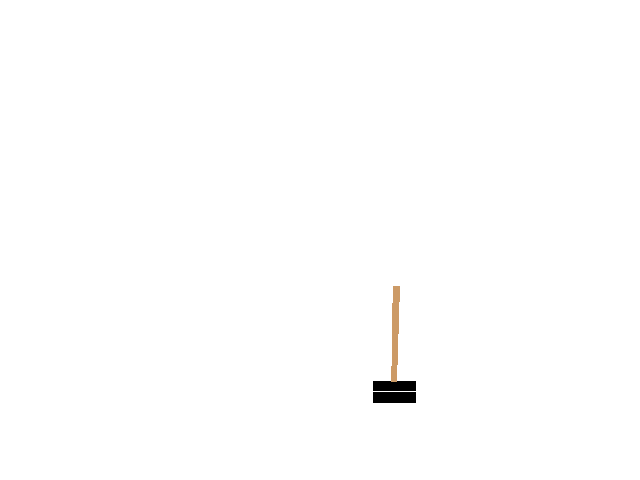

In [9]:
# use code from the github link above to apply the trained model to the cartpole environment and show the results
model = 1
def render_policy_net(model_path, action, X, n_max_steps = 1000):
    frames = []
    env = gym.make("CartPole-v0")
    obs = env.reset()
    with tf.Session() as sess:
        saver.restore(sess, model_path)
        for step in range(n_max_steps):
            img = render_cart_pole(env, obs)
            frames.append(img)
            action_val = action.eval(feed_dict={X: obs.reshape(1, n_inputs)})
            obs, reward, done, info = env.step(action_val[0][0])
            if done:
                break
    env.close()
    return frames
if model == 1:
    frames = render_policy_net("./tf_logs/16_RL/Cartpole/my_policy_net_pg.ckpt", action, X, n_max_steps=1000)
else:
    frames = render_policy_net("./tf_logs/16_RL/Cartpole/my_good_policy_net_pg.ckpt",
                               action, X, n_max_steps=1000)
video = plot_animation(frames)
plt.show()

This looks much better than without updating the gradients. Almost skillful, at least witn "n_iterations = 1000", "n_max_steps = 1000", and "discount_rate = 0.999". The according model is saved under "./tf_logs/Cartpole/my_1000_1000_0999_policy_net_pg.ckpt". In fact, **this algorithm is really powerful**. It can be used for much harder problems. **AlphaGo** was also based on it (and on *Monte Carlo Tree Search*, which is beyond the scope of this book).<br><br>
**Suggestion or Tip**<br>
Researchers try to find algorithms that work well even when the agent initially knows nothing about the environment. However, unless you are writing a paper, you should inject as much prior knowledge as possible into the agent, as it will speed up training dramatically. For example, you could add negative rewards proportional to the distance from the center of the screen, and to the pole's angle. Also, if you already have a reasonably good policy (e.g., hardcoded), you may want to train the nerual network to imitate it before using policy gradients to imporve it.<br><br>
But next, we go a different path: the agent shall calculate what future rewards (possibly discounted) it expects after an action in a certain situation. The action shall be chosen based on that expectation. To this end, some more theory is necessary.
## Markov Decision Processes
page 457<br>
A *Markov chain* is a stochastic process where a system changes between a finite number of states and the probability to transition from state $s$ to state $s'$ is only determined by the pair $(s,s')$, not on previous states (the system has no memory). Andrey Markov studied these processes in the early 20th century. If the transition $(s,s)$ has probability $1$, then the state $s$ is a *terminal state*: the system cannot leave it (see also Figure 16-7 on page 458 of the book). There can be any integer $n\geq0$ number of terminal states. Markov chains are heavily used in thermodynamics, chemistry, statistics, and much more.<br>
Markov decision processes were first decribed by Richard Bellmann in the 1950s (see the jstor-link above). They are Markov chains where at each state $s$, there is one or more action $a$ that an *agent* can choose from and the transition probilitiy between state $s$ and $s'$ depends on action $a$. Moreover, some transitions $(s,a,s')$ return a reward (positive or negative). The agent's goal is to find a policy that maximizes rewards over time (see also Figure 16-8 on page 459).<br><br>
If an agent acts optimally, then the *Bellman Optimality Equation* applies. This recursive equation states that the optimal value of the current state is equal to the reward it will get on average after taking one optimal action, plus the expected optimal vlaue of all possible next states that this action can lead to:<br><br>
$$V^*(s)={\rm max}_a\sum_{s'}T(s,a,s')[R(s,a,s')+\gamma*V^*(s')]\quad\text{for all $s$.}$$
Here,
- $V^*(s)$ is the *optimal state value* of state $s$,
- $T(s,a,s')$  is the transition probability from state $s$ to state $s'$, given that the agent chose action $a$,
- $R(s,a,s')$ is the reward that the agent gets when it goes from state $s$ to state$s'$, given that the agent chose action $a$, and
- $\gamma$ is the discount rate.

The **Value Iteration** algorithm will have the values $V(s)$ - initialized to 0 - converge towards their optima $V^*(s)$ by iteratively updating them:<br><br>
$$V_{k+1}(s)\leftarrow{\rm max}_a\sum_{s'}T(s,a,s')[R(s,a,s')+\gamma V_k(s')]\quad\text{for all $s$.}$$
Here, $V_k(s)$ is the estimated value of state $s$ in the $k$-th iteration and $\lim_{k\to\infty}V_k(s)=V^*(s)$.
<br><br>
**General note**<br>
This algorithm is an example of *Dynamic Programming*, which breaks down a complex problem (in this case estimating a potentially infinite sum of discounted future rewards) into tractable sub-problems that can be tackled iteratively (in this case finding the action that maximizes the average reward plus the discounted next state value).<br><br>
Yet even when $V^*(s)$ is known, it is still unclear what the agent shall do. Bellman thus extended the concept of state values $V(s)$ to *state-action values*, called *Q-values*. The optimal Q-value of the state-action pair $(s,a)$, noted $Q^*(s,a)$, is the sum of discounted future rewards the agent will earn on average when it applies to correct policy, i.e., choosing the right action $a$ when in state $s$. The according **Q-value iteration** algorithm is<br><br>
$$Q_{k+1}(s,a)\leftarrow\sum_{s'}T(s,a,s')[R(s,a,s')+\gamma\,{\rm max}_{a'}Q_k(s',a')],\quad\text{for all $(s,a)$.}$$<br>
This is very similar to the value iteration algorithm. Now, the optimal policy $\pi^*(s)$ is clear: when in state $s$, apply that action $a$ for which the Q-value is highest: $\pi^*(s)={\rm argmax}_aQ^*(s,a)$. We will practice this on the Markov decision process shown in Figure 16-8 on page 459 of the book.

In [10]:
nan = np.nan # for transitions that do not exist (and thus have probability 0 but shall not be updated)
# transition probabilities
T = np.array([
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]], # at state s_0: actions a_0, a_1, a_2 to states s_0, s_1, s_2
    [[0.0, 1.0, 0.0], [nan, nan, nan], [0.0, 0.0, 1.0]], # at state s_1
    [[nan, nan, nan], [0.8, 0.1, 0.1], [nan, nan, nan]]  # at state s_2
])
# rewards associated with the transitions above
R = np.array([
    [[10., 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
    [[10., 0.0, 0.0], [nan, nan, nan], [0.0, 0.0, -50]],
    [[nan, nan, nan], [40., 0.0, 0.0], [nan, nan, nan]]
])
# possible actions
possible_actions = [
    [0, 1, 2], # in state s0
    [0, 2],    # in state s1
    [1]]       # in state s2
# Q value initialization
Q = np.full((3, 3), -np.inf) # -infinity for impossible actions
for state, actions in enumerate(possible_actions):
    print(state, actions)
    Q[state, actions] = 0.0  # 0.0 for possible actions
print(Q)

0 [0, 1, 2]
1 [0, 2]
2 [1]
[[  0.   0.   0.]
 [  0. -inf   0.]
 [-inf   0. -inf]]


Above, we have specified the model (lists of transition probabilities T, rewards R, and possible actions) and initialized the Q-values. Using $-\infty$ for impossible actions ensures that those actions will not be chosen by the policy. The enumerate command can be quite helpful and is therefore shortly introduced below.

In [11]:
# see the python tips link above
for counter, value in enumerate(["apple", "banana", "grapes", "pear"]):
    print(counter, value)
print()
for counter, value in enumerate(["apple", "banana", "grapes", "pear"], 1):
    print(counter, value)
print()
counter_list = list(enumerate(["apple", "banana", "grapes", "pear"], 1))
print(counter_list)

0 apple
1 banana
2 grapes
3 pear

1 apple
2 banana
3 grapes
4 pear

[(1, 'apple'), (2, 'banana'), (3, 'grapes'), (4, 'pear')]


Now, define residual parameters and run the Q-value iteration algorithm. The results are very similar to the ones in the book.

In [12]:
# learning parameters
learning_rate = 0.01
discount_rate = 0.95 # try 0.95 and 0.9 (they give different results)
n_iterations = 100
# Q-value iteration
for iteration in range(n_iterations): # loop over iterations
    Q_prev = Q.copy()                 # previous Q
    for s in range(3):                # loop over states s
        for a in possible_actions[s]: # loop over available actions a
            # update Q[s, a]
            Q[s, a] = np.sum([T[s, a, sp] * (R[s, a, sp] +                    # transition probability to sp times ...
                                            discount_rate*np.max(Q_prev[sp])) # ... ( reward + max Q(sp) )
                             for sp in range(3)])                             # sum over sp (sp = s prime)
print(Q)             # print final Q
np.argmax(Q, axis=1) # best action for a given state (i.e., in a given row)

[[21.88646117 20.79149867 16.854807  ]
 [ 1.10804034        -inf  1.16703135]
 [       -inf 53.8607061         -inf]]


array([0, 2, 1])

The Q-value iteration algorithm gives different results for different discount rates $\gamma$. For $\gamma=0.95$, the optimal policy is to choose action 0 (2) [1] in state 0 (1) [2]. But this changes to actions 0 (0) [1] if $\gamma=0.9$. And it makes sense: when someone appreciates the present more than possible future rewards, there is less motivation to go through the fire.
## Temporal Difference Learning and Q-Learning
page 461<br>
Reinforcement Learning problems can often be modelled with Markov Decision Processes, yet initially, there is no knowledge on transition probabilities $T(s,a,s')$ and rewards $R(s,a,s')$. The algorithm must experience every connection at least once to obtain the rewards and multiple times to get a glimplse of the probabilities.<br>
**Temporal Difference Learning** (TD Learning) is similar to *Value Iteration* (see above) but adapted to the fact that the agent has only partial knowledge of the MDP. In fact, it often only knows the possible states and actions and thus must *explore* the MDP via an *exploration policy* in order to recursively update the estimates for the state values based on observed transitions and rewards. This is achieved via the **Temporal Difference Learning algorithm** (Equation 16-4 in the book),
$$V_{k+1}\leftarrow(1-\alpha)V_k(s)+\alpha(r+\gamma V_k(s'))\,,$$
where $\alpha$ is the learning rate (e.g., 0.01).<br>
For each state $s$, this algorithm simply keeps track of a running average of the next reward (for the transition to the state it will end up at next) and future rewards (via the state value of the next state, since the agent is assumed to act optimally). This algorithm is stochastic: the next state $s'$ and the reward gained by going to it are not known at state $s$: this transition only happens with a certain probability and thus will – in general – be different from time to time.<br><br>
**Suggestion or Tip**<br>
TD Learning has many similarities with Stochasitc Gradient Descent, in particular the fact that it handles one sample at a time. Just like SGD, it can only truly converge if you gradually reduce the learning rate (otherwise it will keep bouncing around the optimum).<br><br>
The **Q-Learning algorithm** resembles the *Temporal Difference Learning algorithm* just like the *Q-Value Iteration algorithm* resembles the *Value Iteration algorithm* (see Equation 16-5 in the book):
$$Q_{k+1}(s,a)\leftarrow(1-\alpha)Q_k(s,a)+\alpha(r+\gamma\,{\rm max}_{a'}Q_k(s',a'))\,.$$
<br>
In comparison with the *TD Learning algorithm* above, there is another degree of freedom: the action $a$. It is assumed that the agent will act optimally. As a consequence, the maximum (w.r.t. actions a') Q-Value is chosen for the next state-action pair. Now to the implementation!

In [13]:
n_states = 3    # number of MDP states
n_actions = 3   # number of actions
n_steps = 20000 # number of steps (=iterations)
alpha = 0.01    # learning rate
gamma = 0.99    # discount rate
# class for a Markov Decision Process (taken from the github link above)
class MDPEnvironment(object):
    def __init__(self, start_state=0): # necessary __init__
        self.start_state=start_state
        self.reset()
    def reset(self):                   # reset the environment
        self.total_rewards = 0
        self.state = self.start_state
    def step(self, action):            # make a step
        next_state =np.random.choice(range(3),                # use the transition probabilities T above and the ...
                                     p=T[self.state][action]) # ... state and action to infer the next state
        reward = R[self.state][action][next_state]            # in this fashion, also calculate the obtained reward
        self.state = next_state                               # update the state ...
        self.total_rewards += reward                          # ... and the total rewards
        return self.state, reward
# function that returns a random action that is in line the given state (taken from github link above)
def policy_random(state):
    return np.random.choice(possible_actions[state])          # see definition of "possible_actions" above
exploration_policy = policy_random                            # use that function as an exploration policy
# reinitialize the Q values (they had been updated above)
Q = np.full((3, 3), -np.inf)                                  # -infinity for impossible actions
for state, actions in enumerate(possible_actions):            # see (unchanged) defintion of possible_actions above
    Q[state, actions] = 0.0                                   # 0.0 for possible actions
print(Q)
# use the class defined above
env = MDPEnvironment()
# loop through all steps (=iterations)
for step in range(n_steps):
    action = exploration_policy(env.state)                    # give our "exploration_policy = policy_random" the ...
                                                              # ... current state and obtain an action in return
    state = env.state                                         # obtain the state from the environment
    next_state, reward = env.step(action)                     # apply the action to obtain the next state and reward
    next_value = np.max(Q[next_state])                        # assuming optimal behavior, use the highest Q-value ...
                                                              # ... that is in line with the next state (maximise ...
                                                              # ... w.r.t. the actions)
    Q[state, action] = (1-alpha)*Q[state, action] + alpha*(reward + gamma * next_value) # update Q value
Q                                                             # return the final Q values

[[  0.   0.   0.]
 [  0. -inf   0.]
 [-inf   0. -inf]]


array([[42.26929835, 41.1911737 , 37.26920522],
       [21.22208451,        -inf, 22.47361964],
       [       -inf, 74.90772866,        -inf]])

The above implementation is different from the book (where prior knowledge on the transition probabilities is used). Accordingly, the resulting Q-values are different from those in the book and closer to the ones listed in the github link above.<br>
With enough iterations, this algorithm will converge towards theo optimal Q-values. It is called an **off-policy** algorithm since the policy that is used for training is different from the one that will be applied. Surprisingly, this algorithm converges towards the optimal policy by stumbling around: it's a stochastic process. So although this works, there should be a more promising approach. This shall be studied next.
### Exploration Policies
page 463<br>
Above, the transitions probabilites $T(s,a,s')$ are used to explore the MDP and obtain a policy. However, this might take a long time. An alternative approach is to use an **$\epsilon$-greedy policy** (greedy = gierig): in each state, it chooses the state-action value Q(s,a) with the highest score with probability $1-\epsilon$ or a random action (i.e., Q(s,...)) with probability $\epsilon$. This way, the policy will explorte the interesting parts of the network more intensely while still getting in touch (eventually) with all other parts. It is common to start with $\epsilon=1$ (totally random) and transition to $\epsilon=0.05$ (choose highest Q-value most of the time).<br>
Another way to incite the agent to explore the entire network is to artificially increase the value of state action pairs that have not been visited frequently. This can be done like so (Equation 16-6 in the book):<br><br>
$$Q(s,a)\leftarrow(1-\alpha)Q(s,a)+\alpha\left(r+\gamma\,{\rm max}_{\alpha'}f(Q(s',a'),N(s',a')\right)\,,$$<br>
where $\alpha$ is the learning rate, $\gamma$ is the discount rate, and $f(q,n)$ is a function of the Q-value $q$ and the additional reward $n$, e.g. $f(q,n)=q+K/(1+n)$, where $K$ is a **curiosity hyperparameter** and $n$ is the number of times the Q-value $q$ has been visited.
### Approximate Q-Learning
page 464<br>
Unfortunately, Q-Learning as described above dose not scale well. For example, in Ms. Pac-Man there exist more than 250 pellets that can be already eaten or not. This alone gives rise to $2^{250}\approx10^{75}$ states, i.e., more than the number of atoms in the universe. And this is just the pellets! There is no way, a policy could completely explore the according MDP.<br>
The solution is **Approximate Q-Learning** where estimates for the Q-values are inferred from a managable number of parameters. For a long time, the way to go had been to hand-craft features, e.g., the distances between Ms. Pac-Man and the ghosts. But DeepMind showed that deep neural networks can perform much better. On top, they do not require feature engineering. A DNN that is used to estimate Q-Values is called a **Deep Q-Network (DQN)**, and using a DQN for Approximate Q-Learning (and subsequently inferring a policy from the Q-Values) is called **Deep Q-Learning**.

The rest of this chapter is about using Deep Q-Learning to train a computer on Ms. Pac-Man, much like DeepMind did in 2013. This code is quite versatile. It works for many Atari games but tends to have problems with games with long-running storylines.
## Learning to Play Ms. Pac-Man Using Deep Q-Learning
page 464<br>
Some installations shall be made:
- Homebrew (see http://brew.sh/). For macOS, run '/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"' in the terminal and for Ubuntu, use 'apg-get install -y python3-numpy python3-dev cmake zlib1g-dev libjpeg-dev\xvfb libav-tools xorg-dev python3-opengl libboost-all-dev libsdl2-dev swig'.
- Extra python modules for the gym of OpenAI, via "pip3 install --upgrade 'gym[all]'".

With these, we should manage to create a Ms. Pac-Man environment.

In [14]:
env = gym.make("MsPacman-v0")
obs = env.reset()
print(obs.shape)        # [height, width, channels]
print(env.action_space) # possible actions

(210, 160, 3)
Discrete(9)


So the agent observes a picture (screenshot) of 210 pixels height and 160 pixels width, with each pixel having three color values: the intensity of red, green, and blue. The agent may react by returning an action to the environment. There are nine discrete actions, corresponding to the nine joystick positions ([up, middle, down]x[left, middle, right]). The screenshots are a bit too large and grayscale should suffice. So we preprocess the data by cropping the image to the relevant part and converting the color image to grayscale. This will speed up training.

[[0.0, 0.1, 0.2, 0.3, 0.4], [0, 1, 2, 3, 4]]
[[0.0, 0.1, 0.2, 0.3, 0.4], [0, 10, 20, 30, 40]]
[[0.0, 0.1, 0.2, 0.3, 0.4], [0, 1, 2, 3, 4], [0, 10, 20, 30, 40]]
[[0.0, 0.1, 0.2, 0.3, 0.4]]
(88, 80, 1)


<IPython.core.display.Javascript object>


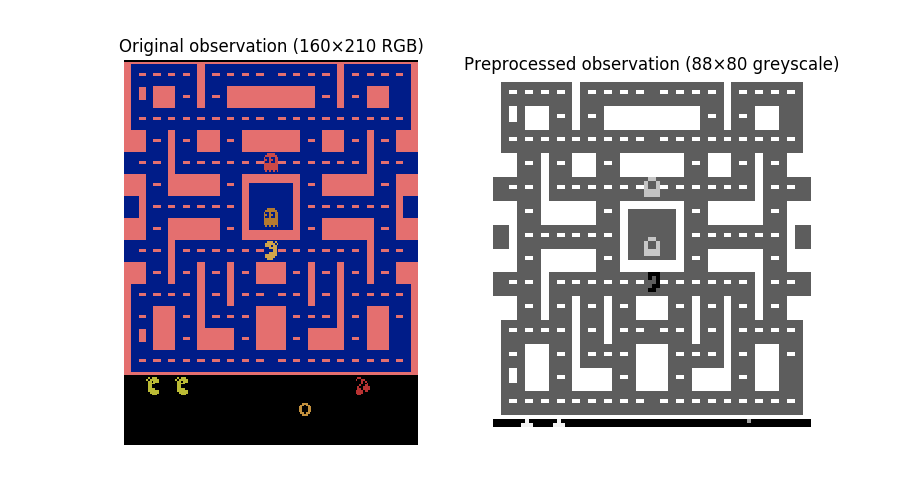

In [15]:
# see https://docs.python.org/2.3/whatsnew/section-slices.html for details on slices
trial_list = [[0.0,0.1,0.2,0.3,0.4],
              [0,1,2,3,4],
              [0,10,20,30,40]]
print(trial_list[:2])  # print list elements until before element 2, i.e., 0 and 1
print(trial_list[::2]) # print all list elements that are reached by step size 2, i.e., 0 and 2, not 1
print(trial_list[:3])  # print list elements until before element 3, i.e., 0, 1, and 2 (this means all, here)
print(trial_list[::3]) # print all list elements that are reached by step size 3, i.e., only 0, not 1 and 2
# back to the book
mspacman_color = np.array([210, 164, 74]).mean()
def preprocess_observation(obs):
    img = obs[1:176:2, ::2]       # use only every second line from line 1 to line 176 (top towards bottom) and in ...
                                  # ... each line, use only every second row
    img = img.mean(axis=2)        # go to grayscale by replacing the 3 rgb values by their average
    img[img==mspacman_color] = 0  # draw Ms. Pac-Man in black
    img = (img-128)/128 - 1       # normalize grayscale
    return img.reshape(88, 80, 1) # reshape to 88 rows and 80 columns; each scalar entry is the color in grayscale ...
                                  # ... and thus is a bit different from the book
#print(preprocess_observation(obs))
print(preprocess_observation(obs).shape)
# slightly modified from the github link above
plt.figure(figsize=(9, 5))
plt.subplot(121)
plt.title("Original observation (160×210 RGB)")
plt.imshow(obs)
plt.axis("off")
plt.subplot(122)
plt.title("Preprocessed observation (88×80 greyscale)")
# the output of "preprocess_observation()" is reshaped as to be in line with the placeholder "X_state", to which ...
# ... it will be fed; below, another reshape operation is appropriate to conform the (possbily updated w.r.t. the ...
# ... book) "plt.imshow()" command, https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html
plt.imshow(preprocess_observation(obs).reshape(88,80), interpolation="nearest", cmap="gray")
plt.axis("off")
plt.show()

The next task will be to build the DQN (*Deep Q-Network*). In principle, one could just feed it a state-action pair (s, a) and have it estimate the Q-Value Q(s, a). But since the actions are discrete and only 9 actions are possible, one can also feed the DQN the state s and have it estimate Q(s, a) for all 9 possible actions. The DQN shall have 3 convolutional layers followed by 2 fully connected layers, the last of which is the output layer. An actor-critic approach is used. They share the same architecture but have different tasks: the actor plays and the critic watches the play and tries to identify and fix shortcomings. After each few iterations, the critic network is copied to the actor network. So while they share the same architecture their parameters are different. Next, we define a function to build these DQNs.

In [16]:
### construction phase
# resetting the graph seems to always be a good idea
reset_graph()
# DQN architecture / hyperparameters
input_height = 88
input_width = 80
input_channels = 1
conv_n_maps = [32, 64, 64]
conv_kernel_sizes = [(8,8), (4,4), (3,3)]
conv_strides = [4, 2, 1]
conv_paddings = ["SAME"] * 3
conv_activation =[tf.nn.relu] * 3
n_hidden_in = 64 * 11 * 10 # conv3 has 64 maps of 11x10 each
n_hidden = 512
hidden_activation = tf.nn.relu # corrected from "[tf.nn.relu]*3", according to the code on github (see link above)
n_outputs = env.action_space.n # 9 discrete actions are available
initializer = tf.contrib.layers.variance_scaling_initializer()
# function to build networks with the above architecture; the function receives a state (observation) and a name
def q_network(X_state, name):
    prev_layer = X_state # input from the input layer
    conv_layers = []     # container for all the layers of the convolutional network (input layer is not part of that)
    with tf.variable_scope(name) as scope:
        # loop through tuples, see "https://docs.python.org/3.3/library/functions.html#zip" for details;
        # in the first (second) [next] step take the first (second) [next] elements of the lists conv_n_maps, ...
        # ... conv_kernel_sizes, etc.; this continues until one of these lists has arrived at the end;
        # here, all these lists have length 3 (see above)
        for n_maps, kernel_size, stride, padding, activation in zip(conv_n_maps, conv_kernel_sizes, conv_strides,
                                                                   conv_paddings, conv_activation):
            # in the next step (of the for-loop), this layer will be the "previous" one
            # ["stride" -> "strides", see https://www.tensorflow.org/api_docs/python/tf/layers/conv2d]
            prev_layer = tf.layers.conv2d(prev_layer, filters=n_maps, kernel_size=kernel_size, strides=stride,
                                          padding=padding, activation=activation, kernel_initializer=initializer)
            # put the current layer into the container for all the layers of the convolutional neural network
            conv_layers.append(prev_layer)
        # make the last output a vector so it it can be passed easily to the upcoming fully connected layer
        last_conv_layer_flat = tf.reshape(prev_layer, shape=[-1, n_hidden_in])
        # first hidden layer
        hidden = tf.layers.dense(last_conv_layer_flat, n_hidden, activation=hidden_activation,
                                 kernel_initializer=initializer)
        # second hidden layer = output layer (these are the results!)
        outputs = tf.layers.dense(hidden, n_outputs, kernel_initializer=initializer)
    # let tensorflow figure out what variables shall be trained ...
    trainable_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=scope.name)
    # ... and give these variables names so they can be distinguished in the graph
    trainable_vars_by_name = {var.name[len(scope.name):]: var for var in trainable_vars}
    return outputs, trainable_vars_by_name # return the outputs and the dictionary of trainable variables
# input, actor, critic, and model copying
X_state = tf.placeholder(tf.float32, shape=[None, input_height, input_width, input_channels])      # input placeholder
actor_q_values, actor_vars = q_network(X_state, name="q_networks/actor")                           # actor model
#q_values = actor_q_values.eval(feed_dict={X_state: [state]})
critic_q_values, critic_vars = q_network(X_state, name="q_networks/critic")                        # critic model
copy_ops = [actor_var.assign(critic_vars[var_name]) for var_name, actor_var in actor_vars.items()] # copy critic ... 
copy_critic_to_actor = tf.group(*copy_ops)                                                         # ... to actor
# some more theory is due
print("next, some text...")

next, some text...


The somehow initialized Q-values will have the actor network play the game (initially somehow random), update the encountered Q-values (via the default discounted rewards), and leave the remaining Q-values unchanged. Every now and then, the critic network is tasked with predicting all Q-values by fitting the weights and biases. The Q-values resulting from the fitted weights and biases will be slightly different. This is supervised learning. The cost function that the critic network shall minimize is<br><br>
$$J(\theta_{\rm critic})=\frac{1}{m}\sum_{i=1}^m\left(y^{(i)}-Q(s^{(i)},a^{(i)},\theta_{\rm critic})\right)^2{\rm , with }\quad y^{(i)}=r^{(i)}+\gamma {\rm max}_{a'}Q\left(s'^{(i)},a^{(i)},\theta_{\rm actor}\right)\,,$$
where
- $s^{(i)},\,a^{(i)},\,r^{(i)},\,s'^{(i)}$ are respectively the state, action, reward, and the next state of the $i^{\rm th}$ memory sampled from the replay memory,
- $m$ is the size of the memory batch,
- $\theta_{\rm critic}$ and $\theta_{\rm actor}$ are the critic and the actor's parameters,
- $Q(s^{(i)},a^{(i)},\theta_{\rm critic})$ is the critic DQN's prediction of the $i^{\rm th}$ memorized state-action's Q-value,
- $Q(s^{(i)},a^{(i)},\theta_{\rm actor})$ is the actor DQN's prediction of Q-value it can expect from the next state $s'^{\rm(i)}$ if it chooses action $a'$,
- $y^{(i)}$ is the target Q-value for the $i^{\rm th}$ memory. Note that it is equal to the reward actually observed by the actor, plus the actor's *prediction* of what future rewards it should expect if it were to play optimally (as far as it knows), and
- $J(\theta_{\rm critic})$ is the cost function used to train the critic DQN. As you can see, it is just the mean squared error between  the target Q-values $y^{(i)}$ as estimated by the actor DQN, and the critic DQN's prediction of these Q-values.

**General note**<br>
The replay memory [see code and/or text in the book] is optional but highly recommended. Without it , you would train the critic DQN using consecutive experiences that may be very correlated. This would introduce a lot of bias and slow down the training algorithm's convergence. By using a replay memory, we ensure that the memories fed to the training algorithm can be fairly uncorrelated.

In [17]:
# the actor DQN computes 9 Q-values: 1 for each possible action; use one-hot encoding to select only the one that ...
# ... is actually chosen (https://www.tensorflow.org/api_docs/python/tf/one_hot)
X_action = tf.placeholder(tf.int32, shape=[None])
q_value = tf.reduce_sum(critic_q_values * tf.one_hot(X_action, n_outputs), axis=1, keep_dims=True)
# feed the Q-values for the critic network through a placeholder y and do all the rest for training operations
y = tf.placeholder(tf.float32, shape=[None, 1])
cost = tf.reduce_mean(tf.square(y - q_value))
global_step = tf.Variable(0, trainable=False, name="global_step")
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cost, global_step=global_step)
# initializer and saver nodes
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Instructions for updating:
keep_dims is deprecated, use keepdims instead


For the execution phase, we will need the following tools.

In [18]:
# time keeping; for details, see the contribution of user "daviewales" on ...
# ... https://codereview.stackexchange.com/questions/26534/is-there-a-better-way-to-count-seconds-in-python
import time
time_start = time.time()
# another import, see https://docs.python.org/3/library/collections.html#collections.deque
from collections import deque # deque or "double-ended queue" is similar to a python list but more performant
replay_memory_size = 10000                                           # name says it
replay_memory = deque([], maxlen=replay_memory_size)                 # deque container for the replay memory
# function that samples random memories
def sample_memories(batch_size):
    # use "np.rand" instead of "rnd", see ...
    # ... "https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.permutation.html"
    indices = np.random.permutation(len(replay_memory))[:batch_size] # take "batch_size" random indices
    cols = [[], [], [], [], []]                                      # state, action, reward, next_state, continue
    # loop over indices
    for idx in indices:
        memory = replay_memory[idx]                                  # specifice memory
        for col, value in zip(cols, memory):                         # fancy way of moving the values in the ...
            col.append(value)                                        # ... memory into col
        cols = [np.array(col) for col in cols]                       # make entries numpy arrays
        return (cols[0], cols[1], cols[2].reshape(-1,1), cols[3], cols[4].reshape(-1,1))
# use an epsilon-greedy policy
eps_min = 0.05                                                       # next action is random with probability of 5%
eps_max = 1.0                                                        # next action will be random for sure
eps_decay_steps = 50000                                              # decay schedule for epsilon
# receive the Q values for the current state and the current step
def epsilon_greedy(q_values, step):
    epsilon = max(eps_min, eps_max - (eps_max-eps_min) * step/eps_decay_steps) # calculate the current epsilon
    if np.random.rand() < epsilon:                                             # choice of random or optimal action
        return np.random.randint(n_outputs)                                    # random action
    else:
        return np.argmax(q_values)                                             # optimal action
### execution phase
n_steps = 10                               # total number of training steps (default: 100000)
training_start = 1000                      # start training after 1000 game iterations
training_interval = 3                      # run a training step every few game iterations (default: 3)
save_steps = 50                            # save the model every 50 training steps
copy_steps = 25                            # copy the critic to the actor every few training steps (default: 25)
discount_rate = 0.95                       # discount rate (default: 0.95)
skip_start = 90                            # skip the start of every game (it's just waiting time)
batch_size = 50                            # batch size (default: 50)
iteration = 0                              # initialize the game iterations counter
checkpoint_path = "./tf_logs/16_RL/MsPacMan/my_dqn.ckpt" # checkpoint path
done = True                                # env needs to be reset
# remaining import
import os
# start the session
with tf.Session() as sess:
    # restore a session if one has been stored
    if os.path.isfile(checkpoint_path):
        saver.restore(sess, checkpoint_path)
    # otherwise start from scratch
    else:
        init.run()
    while True:                            # continue training ...
        step = global_step.eval()          # ... until step ...
        if step >= n_steps:                # ... has reached n_steps ...
            break                          # ... (stop in that latter case)
        iteration += 1                     # count the iterations
        if done:                           # game over: start again ...
            # restart 1/3
            obs = env.reset()              # ... and reset the environment
            # restart 2/3
            for skip in range(skip_start): # skip the start of each game
                obs, reward, done, info = env.step(0)                # get data from environment (Ms. Pacman)
            # restart 3/3
            state = preprocess_observation(obs)                      # preprocess the state of the game (screenshot)
        # actor evaluates what to do
        q_values = actor_q_values.eval(feed_dict={X_state: [state]}) # get available Q-values for the current state
        action = epsilon_greedy(q_values, step)                      # apply the epsilon-greedy policy
        # actor plays
        obs, reward, done, info = env.step(action)                   # apply the action and get new data from env
        next_state = preprocess_observation(obs)                     # preprocess the next state (screenshot)
        # let's memorize what just happened
        replay_memory.append((state, action, reward, next_state, 1.0 - done))
        state = next_state
        # go to the next iteration of the while loop (i) before training starts and (ii) if learning is not scheduled
        if iteration < training_start or iteration % training_interval != 0:
            continue
        # if learning is scheduled for the current iteration, get samples from the memory, update the Q-values ...
        # ... that the actor learned as well as the rewards, and run a training operation
        X_state_val, X_action_val, rewards, X_next_state_val, continues = (sample_memories(batch_size))
        next_q_values = actor_q_values.eval(feed_dict={X_state: X_next_state_val})
        max_next_q_values = np.max(next_q_values, axis=1, keepdims=True)
        y_val = rewards + continues * discount_rate * max_next_q_values
        training_op.run(feed_dict={X_state: X_state_val, X_action: X_action_val, y: y_val})
        # regularly copy critic to actor and ... 
        if step % copy_steps == 0:
            copy_critic_to_actor.run()
        # ... save the session so it could be restored
        if step % save_steps == 0:
            saver.save(sess, checkpoint_path)
# the output of this time keeping (see top of this cell) will be in seconds
time_finish = time.time()
print(time_finish - time_start)

14.940124988555908


With a function from the github link above, we can visualize the play of the trained model.

INFO:tensorflow:Restoring parameters from ./tf_logs/16_RL/MsPacMan/my_dqn.ckpt


<IPython.core.display.Javascript object>


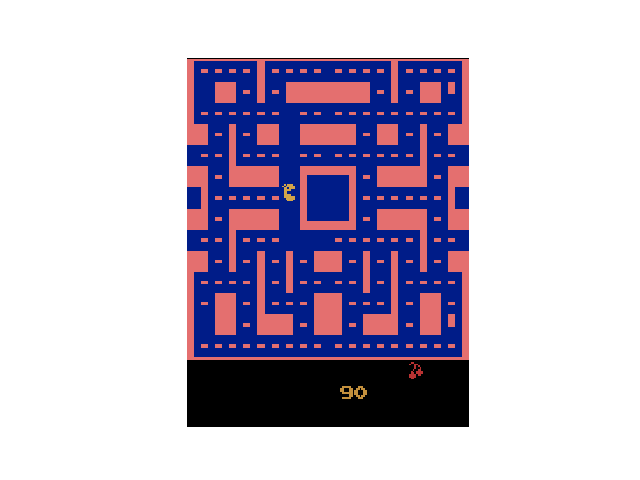

In [19]:
frames = []
n_max_steps = 10000
with tf.Session() as sess:
    saver.restore(sess, checkpoint_path)
    obs = env.reset()
    for step in range(n_max_steps):
        state = preprocess_observation(obs)
        q_values = actor_q_values.eval(feed_dict={X_state: [state]}) # from "online_q_values" to "actor_q_values"
        action = np.argmax(q_values)
        obs, reward, done, info = env.step(action)
        img = env.render(mode="rgb_array")
        frames.append(img)
        if done:
            break
plot_animation(frames)

**Suggestion or Tip**<br>
Unfortunately, training is very slow: if you use your laptop for training, it will take days before Ms. Pac-Man gets any good, and if you look at the learning curve, measuring the average rewards per episode, you will notice that it is extremely noisy. At some points there may be no apparent progress for a very long time until suddenly the agent learns to survive a reasonable amount of time. As mentioned earlier, one solution is to inject as much prior knowledge as possible into the model (e.g., through preprocessing, rewards, and so on), and you can also try to bootstrap the model by first training it to imitate a basic strategy. In any case, RL still requires quite a lot of patience and tweaking but the end result is very exciting.
## Exercises
page 473<br>
### 1.-7.
Solutions are shown in Appendix A of the book and in the separate notebook *ExercisesWithoutCode*.
### 8.
Use Deep Q-Learning to tackle OpenAI gym's "BypedalWalker-v2". The Q-networks do not need to be very deep for this task.

In [20]:
# everything below is mainly from the github link above
# the rendering command (see github link) does not work here; the according code is adapted; frames are not ...
# ... displayed, here
env = gym.make("BipedalWalker-v2")
print(env)
obs = env.reset()
print(obs)
print(env.action_space)
print(env.action_space.low)
print(env.action_space.high)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
<TimeLimit<BipedalWalker<BipedalWalker-v2>>>
[ 2.74743512e-03 -1.15991896e-05  9.02299415e-04 -1.59999228e-02
  9.19910073e-02 -1.19072467e-03  8.60251635e-01  2.28293116e-03
  1.00000000e+00  3.23961042e-02 -1.19064655e-03  8.53801474e-01
  8.42094344e-04  1.00000000e+00  4.40814018e-01  4.45820123e-01
  4.61422771e-01  4.89550203e-01  5.34102798e-01  6.02461040e-01
  7.09148884e-01  8.85931849e-01  1.00000000e+00  1.00000000e+00]
Box(4,)
[-1. -1. -1. -1.]
[1. 1. 1. 1.]


Build all possible combinations of actions (cf. above).

In [21]:
# see https://docs.python.org/3.7/library/itertools.html#itertools.product
from itertools import product
possible_torques = np.array([-1.0, 0.0, 1.0])
possible_actions = np.array(list(product(possible_torques, repeat=4)))
possible_actions.shape
print(possible_actions)

[[-1. -1. -1. -1.]
 [-1. -1. -1.  0.]
 [-1. -1. -1.  1.]
 [-1. -1.  0. -1.]
 [-1. -1.  0.  0.]
 [-1. -1.  0.  1.]
 [-1. -1.  1. -1.]
 [-1. -1.  1.  0.]
 [-1. -1.  1.  1.]
 [-1.  0. -1. -1.]
 [-1.  0. -1.  0.]
 [-1.  0. -1.  1.]
 [-1.  0.  0. -1.]
 [-1.  0.  0.  0.]
 [-1.  0.  0.  1.]
 [-1.  0.  1. -1.]
 [-1.  0.  1.  0.]
 [-1.  0.  1.  1.]
 [-1.  1. -1. -1.]
 [-1.  1. -1.  0.]
 [-1.  1. -1.  1.]
 [-1.  1.  0. -1.]
 [-1.  1.  0.  0.]
 [-1.  1.  0.  1.]
 [-1.  1.  1. -1.]
 [-1.  1.  1.  0.]
 [-1.  1.  1.  1.]
 [ 0. -1. -1. -1.]
 [ 0. -1. -1.  0.]
 [ 0. -1. -1.  1.]
 [ 0. -1.  0. -1.]
 [ 0. -1.  0.  0.]
 [ 0. -1.  0.  1.]
 [ 0. -1.  1. -1.]
 [ 0. -1.  1.  0.]
 [ 0. -1.  1.  1.]
 [ 0.  0. -1. -1.]
 [ 0.  0. -1.  0.]
 [ 0.  0. -1.  1.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1. -1.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  1.]
 [ 0.  1. -1. -1.]
 [ 0.  1. -1.  0.]
 [ 0.  1. -1.  1.]
 [ 0.  1.  0. -1.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  1.]
 [ 0.  1.  1. -1.]
 [ 0.  1.  1

Build a network and see how it performs.

In [22]:
tf.reset_default_graph()
# 1. Specify the network architecture
n_inputs = env.observation_space.shape[0]  # == 24
n_hidden = 10
n_outputs = len(possible_actions) # == 625
initializer = tf.variance_scaling_initializer()
# 2. Build the neural network
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.selu, kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs, kernel_initializer=initializer)
outputs = tf.nn.softmax(logits)
# 3. Select a random action based on the estimated probabilities
action_index = tf.squeeze(tf.multinomial(logits, num_samples=1), axis=-1)
# 4. Training
learning_rate = 0.01
y = tf.one_hot(action_index, depth=len(possible_actions))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(cross_entropy)
gradients = [grad for grad, variable in grads_and_vars]
gradient_placeholders = []
grads_and_vars_feed = []
for grad, variable in grads_and_vars:
    gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
    gradient_placeholders.append(gradient_placeholder)
    grads_and_vars_feed.append((gradient_placeholder, variable))
training_op = optimizer.apply_gradients(grads_and_vars_feed)
init = tf.global_variables_initializer()
saver = tf.train.Saver()
# 5. execute it, count the rewards, and show them
def run_bipedal_walker(model_path=None, n_max_steps =1000): # function from github but adapted to counting rewards ...
    env = gym.make("BipedalWalker-v2")                      # ... and showing them instead of showing rendered frames
    with tf.Session() as sess:
        if model_path is None:
            init.run()
        else:
            saver.restore(sess, model_path)
        obs = env.reset()
        rewards = 0
        for step in range(n_max_steps):
            action_index_val = action_index.eval(feed_dict={X: obs.reshape(1, n_inputs)})
            action = possible_actions[action_index_val]
            obs, reward, done, info = env.step(action[0])
            rewards += reward
            if done:
                break
    env.close()
    return rewards
run_bipedal_walker()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


-117.23707423769122

The model does not perform well because it has not been trained, yet. This shall be done!

In [23]:
n_games_per_update = 10 # default is 10
n_max_steps = 10        # default is 1000
n_iterations = 100      # default is 1000
save_iterations = 10    # default is 10
discount_rate = 0.95    # default is 0.95
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        print("\rIteration: {}/{}".format(iteration + 1, n_iterations), end="")
        all_rewards = []
        all_gradients = []
        for game in range(n_games_per_update):
            current_rewards = []
            current_gradients = []
            obs = env.reset()
            for step in range(n_max_steps):
                action_index_val, gradients_val = sess.run([action_index, gradients],
                                                           feed_dict={X: obs.reshape(1, n_inputs)})
                action = possible_actions[action_index_val]
                obs, reward, done, info = env.step(action[0])
                current_rewards.append(reward)
                current_gradients.append(gradients_val)
                if done:
                    break
            all_rewards.append(current_rewards)
            all_gradients.append(current_gradients)
        all_rewards = discount_and_normalize_rewards(all_rewards, discount_rate=discount_rate)
        feed_dict = {}
        for var_index, gradient_placeholder in enumerate(gradient_placeholders):
            mean_gradients = np.mean([reward * all_gradients[game_index][step][var_index]
                                      for game_index, rewards in enumerate(all_rewards)
                                          for step, reward in enumerate(rewards)], axis=0)
            feed_dict[gradient_placeholder] = mean_gradients
        sess.run(training_op, feed_dict=feed_dict)
        if iteration % save_iterations == 0:
            saver.save(sess, "./tf_logs/16_RL/BiPedal/my_bipedal_walker_pg.ckpt")
run_bipedal_walker("./tf_logs/16_RL/BiPedal/my_bipedal_walker_pg.ckpt")

Iteration: 100/100WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
INFO:tensorflow:Restoring parameters from ./tf_logs/16_RL/BiPedal/my_bipedal_walker_pg.ckpt


-116.7988135579036

With enough training, the network does indeed better.
### 9. Use policy gradients to train an agent to play *Pong*, the famous Atari game ("Pong-v0" in the OpenAI gym). Beware: an individual observation is insufficient to tell the direction and speed of the ball. One solution is to pass two observations at a time to the neural network policy. To reduce dimensionality and speed up training, you should definitely preprocess these images (crop, resize, and convert them to black and white), and possibly merge them into a single image (e.g., by overlaying them).

A solution may follow later.
### 10. If you have about \$100 to spare, you can purchase a Raspberry Pi 3 plus some cheap robotics components, install TensorFlow on the Pi, and go wild! For an example, check out this fun post (https://goo.gl/Eu5u28) by Lukas Biewald, or take a look at GoPiGo or BrickPi. Why not try to build a real-life cartpole by training the robot using policy gradients? Or build a robotic spider that learns to walk; give it rewards any time it gets closer to some objective (you will need sensors to measure the distance to the objective). The only limit is your imagination.

A solution for this may follow even later.